# Namespace

Before introducing classes, it is useful to learn about Python's scope rules. Class definitions are associated with name fields. To fully understand what is running behind the scenes, you need to know how scopes and namespaces work. Information on this topic is useful for any Python programmer.

## Name Concept

We have seen the concept of name in Python before. But it is worth repeating.

In Python, every entity is actually an object. We access objects by name.

In [1]:
number = 2 

When the above assignment is made, an object is defined in memory and stored there. This object is associated with "number".

We can learn the addresses where objects are kept in memory with the id() function.

In [2]:
id(number) # id gives its ID stored in RAM.

140722407773000

In [3]:
id(2)

140722407773000

id(number) and id(2) have the same identification numbers. (We covered this issue in the "is" parameter. The "is" parameter compares the id values ​​and returns True if these two values ​​are the same.)

In [13]:
2 is number

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\mukir\AppData\Local\Temp/ipykernel_19196/1699108168.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  2 is sayi


True

In [4]:
number = 5 # Python created an object. The name Number became associated with this.
print('id(sayi) =', id(number))
print('id(5) =', id(5))

sayi = sayi + 1 # Python created a new object. The name sayi was re-associated with this.

print('id(sayi) =', id(number))

print('id(6) =', id(6))
 
number2 = 5 # When we say number2 = 5, the new name number2 is associated with the previous object 5.
 

print('id(sayi2) =', id(number2))

print('id(5) =', id(5))

id(sayi) = 140722407773096
id(5) = 140722407773096
id(sayi) = 140722407773128
id(6) = 140722407773128
id(sayi2) = 140722407773096
id(5) = 140722407773096


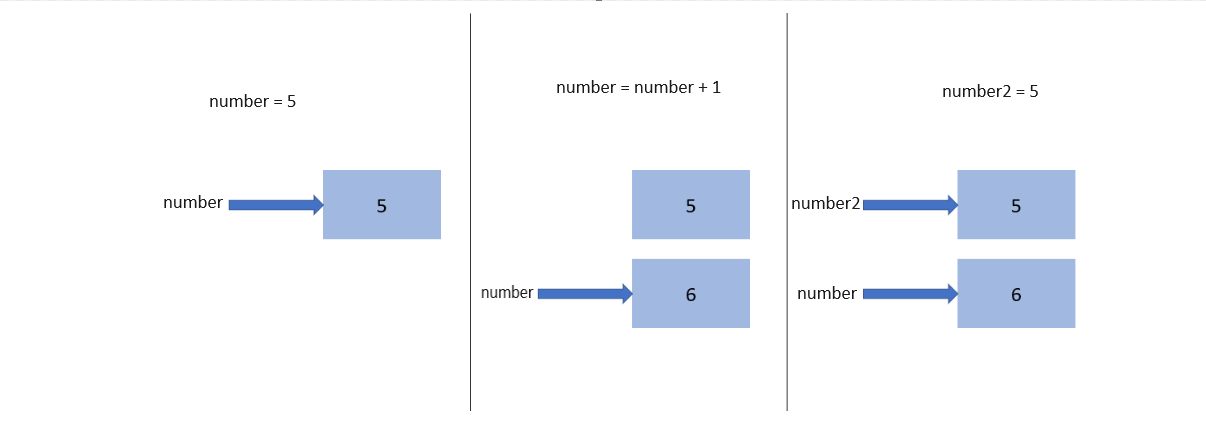

Initially, an object "5" is created and the name "number" is associated with it, when we change number = number+1, a new object "6" is created and "number" is associated with this object.

id(number) and id(6) have the same values.

When number2 = 5 is executed, the new name number2 is associated with the previous object "5".

Python doesn't need to create a new repeating object. This dynamic nature of name binding makes Python powerful; A noun can refer to any type of object.


Python does not create a new repeating object. That's why Python is powerful. Because any name can refer to any type of object.

In [11]:
obj = 5
print(id(obj))
obj = 'Hello'
print(id(obj))
obj = [1,2,3]
print(id(obj))
 

140714335610784
2054762947696
2054762558080


**Important** Functions are also objects.

In [13]:
def greet():
    return "Merhaba"

a = greet()

print(id(a))
print(id(greet()))

2054762949296
2054762949296


# Namespace concept

Namespace or Namespace is a collection of names. Or it is a mapping from names to objects. Most namespaces are currently implemented as Python dictionaries. Namespaces are:

1. Built-in names (e.g. abs(), len() functions or built-in exception names)
2. Global names in a module.
3. They are local names in a function

In a sense, the set of attributes of an object also constitutes a namespace.

The important thing to know about namespaces is that **there is absolutely no relationship between names in different namespaces.**

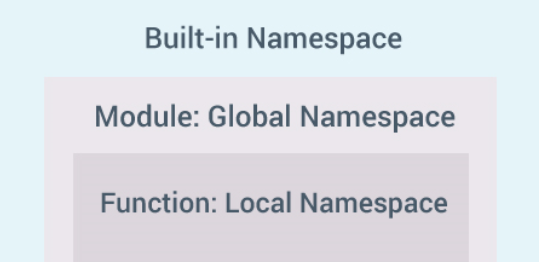

## Word concept

Any noun followed by a period is called an "attribute". For example, in the expression z.real, real is an attribute of the object z. Strictly speaking, references to names in modules are attribute references: in the expression modname.funcname, modname is a module object and funcname is an attribute of it. In this case, there is a simple mapping between the module's attributes and the global names defined in the module: they share the same namespace.

## Creating namespaces

Namespaces are created at different moments and have different lifetimes. The namespace containing built-in names is created when the Python interpreter starts and is never deleted. The global namespace for a module is created when the module definition is read; Normally, module namespaces also persist until the interpreter is closed. Statements executed by the interpreter's top-level call, read from a script, or executed interactively are considered part of a module called __main__, so they have their own global namespace. (Builtin names actually live in a module as well; they're called builtins.)

A function's local namespace is created when the function is called and is deleted when it returns or raises an exception that is not handled within the function. Of course, recursive calls each have their own local namespace.

## Scope Concept

A scope is a textual region of a Python program from which a namespace can be directly accessed. "Directly accessible" here means that an unqualified reference to a name attempts to find the name in the namespace.

Although scopes are determined statically, they are used dynamically. At any given time during execution, there are 3 or 4 nested scopes whose namespaces are directly accessible:

1. The first thing to look for is the innermost scope. Includes local names.

2. The scopes of all surrounding functions called, starting from the nearest surrounding scope, contain non-local, but also non-global names.

3. The next scope contains the global names of the current module

4. The outermost scope (last searched) is the namespace containing built-in names.

If a name is declared global, all references and assignments go directly to the middle scope containing the module's global names. A non-local expression can be used to re-find variables located outside the innermost scope; If not defined as non-local, these variables are read-only (an attempt to write to such a variable creates a new local variable in the innermost scope, leaving the same named outer variable unchanged).


Usually, local scope refers to (textually) local names of the current function. Outside of functions, the local scope references the same namespace as the global scope: the module's namespace. Class definitions place another namespace in local scope.


It is important to understand that scopes are determined textually: the global scope of a function defined in a module is the namespace of that module, regardless of where or by what alias the function is called. On the other hand, the actual name lookup is done dynamically at runtime - however, the language definition is evolving towards static name resolution at "compile" time, so don't rely on dynamic name resolution! (In fact, local variables are already statically determined.)


A particular quirk of Python is that - if no global or non-local expressions are valid - assignments to names always fall into the innermost scope. Assignments don't copy data - they just bind names to objects. The same goes for deletes: the del x statement removes the binding of x from the namespace referenced by the local scope. In fact, all operations that introduce new names use local scope: in particular, import statements and function definitions bind the module or function name in local scope.


The global expression can be used to indicate that certain variables live in the global scope and should return there; non-local indicates that certain variables live in an enclosing scope and should return there.

In [2]:
x = "global scope"
def outer_func():
    x = "outer func scope"
    def local_func():
        x = "local func scope"
        print("local_worked:", x)
        
    def nonlocal_func():
        nonlocal x
        x = "outer func scope changed"
        print("nonlocal_worked:", x)

    def global_func():
        global x
        x = "global scope changed"
        print("global_worked:", x)

    local_func()
    print("After local_func:", x)
    nonlocal_func()
    print("After nonlocal_func:", x)
    global_func()
    print("After global_func:", x)
    
print(x)
outer_func()
print("Global:", x)

global scope
local_worked: local_func_scope
After local_func: outer func scope
nonlocal_worked: outer func scope changed
After nonlocal_func: outer func scope changed
global_worked: global scope changed
After global_func: outer func scope changed
Global: global scope changed


Notice how the local assignment (which is the default) does not change scope_test()'s "variable" binding. The nonlocal assignment changed the "variable" binding of scope_test(), and the global assignment changed the binding at the module level.

You may also find that there was no previous binding for spam before the public assignment.